# Avoiding covid vaccine waste

A friend of my sister came to me a few days back with an interesting problem. Her brother works at the SMS hospital in Jaipur and since I did not get to talk to him directly so I'm assuming he's someone important and busy. They had a problem at hand and needed someone to fix it. There was some talk of this being a government project, though no specifics were discussed at any point.

The problem sounded interesting and well defined enough that I agreed to do it as a pro-bono assignment, provided that I retain the authorship rights of the code. Since this was interesting enough I'm sharing it here so that other people who face the same problem might benefit from it.

## The problem statement

Given facts

1. Every day, multiple vaccination centers receive a fixed number of vaccine vials from the government.
2. Each vial is able to vaccinate 10 people.
3. A vial, once opened, must be completely used within the same day or else the rest of the vaccine is wasted.

Problem definition

1. Towards the end of the day (say 4 pm), each vaccination center has a known number of pending clients to vaccinate.
2. The center should be able to make a decision about opening a new vial or asking a nearby center for their already opened vials to meet their needs.
3. The goal is to make sure that by the end of the day the amount of vaccine that is wasted should be minimized.

## The approach

The first thing is to realize that this can be treated as a classic assignment problem. There are lots of algorithms to solve this problem. [Hungarian algorithm](https://en.wikipedia.org/wiki/Hungarian_algorithm), [scipy.linear_sum_assignment](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.optimize.linear_sum_assignment.html) are algorithms that come to mind immediately for solving these kinds of things.

The next step was to figure out what the resources were and what the recipients were. In this case I started with assigning vials to centers but that did not lead to an optimal solution since exactly how much vaccine was being wasted was not captured by this. I settled on assigning vaccine does (10 per vial) to an individual.

Each vaccination center gets their own user account. They can then enter data regarding how many vaccines are available with them and how many people are waiting to be vaccinated at that center.

Based on that information, we calculate the best assignment of vaccines to people, assuming any vaccine can be applied to any person irrespective of which vaccination center they are at. To calculate this assignment, we need to find a 'cost' of assigning a vaccine to some person. A simple way of doing this was to use google maps api to find the driving distance from one vaccination center to another. Thus, assigning a vaccine to a person who is already at the vaccination center has cost 0 and assigning it to someone who is 30 minutes away has a cost of 30.

Once the assignment was complete, we grouped the vaccines by center and created a table to show how many vaccines need to go from what vaccination center to another.

To interact with this system, a simple ui was made using flask, jinja, and bootstrap. For the database I used sqlite since this was supposed to be used by a maximum of 5000 vaccination centers.

## The look

The main idea was to find a solution to an important problem. I used bootstrap defaults to model the UI and the final product looked like this:

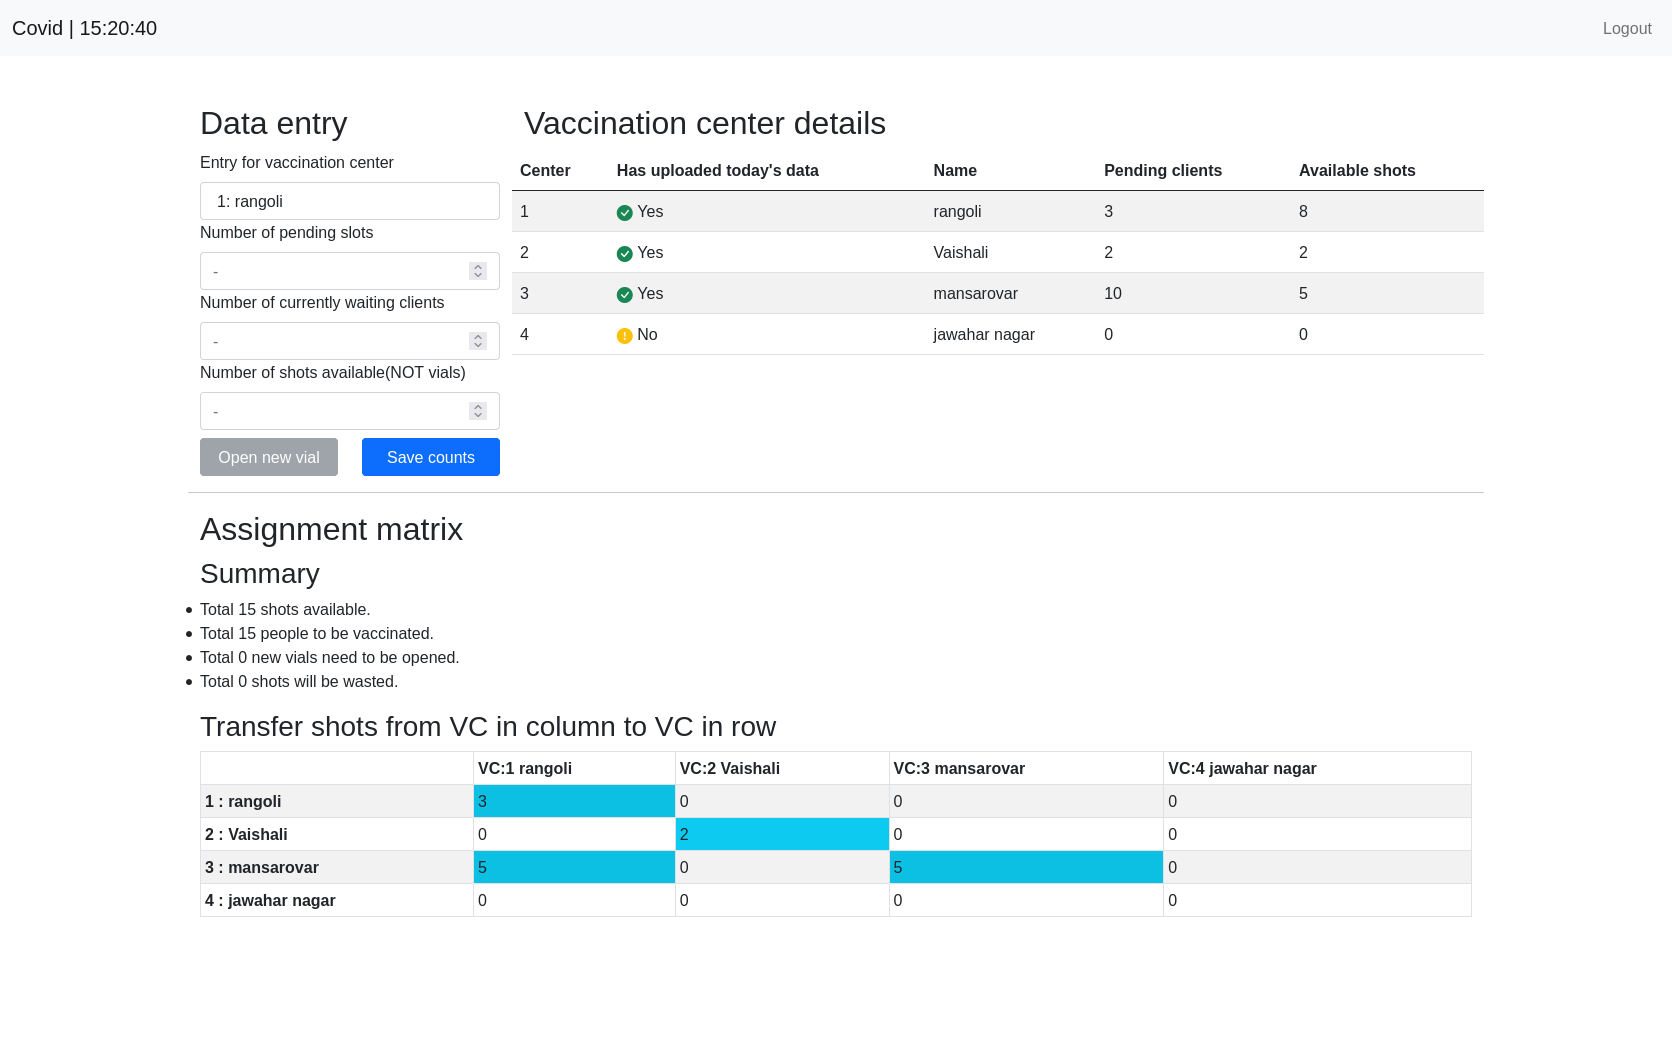

You could enter data in the top left area, informing everyone about how many shots you had already opened and ready to use, along with how many people were waiting in your center.

The assignment matrix shows that from VC1 5 shots need to be transferred to VC3. With this no new vials need to be opened. If implemented, this should allow states to stop wasting vaccines during this pandemic.

The code is available at [gitlab.com/thesage21/covid](https://gitlab.com/theSage21/covid).